In [1]:
# Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense, MaxPool2D


In [2]:
# Importing Tabular Data
tabular_data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/HAM10000_metadata.csv')
print(tabular_data.head())


     lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear


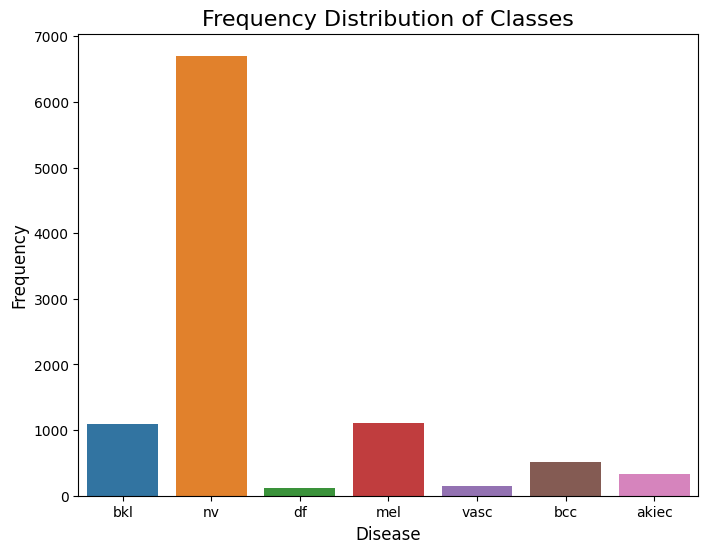

In [3]:
# Frequency Distribution of Classes
plt.figure(figsize=(8, 6))
sns.countplot(x='dx', data=tabular_data)
plt.xlabel('Disease', size=12)
plt.ylabel('Frequency', size=12)
plt.title('Frequency Distribution of Classes', size=16)
plt.show()

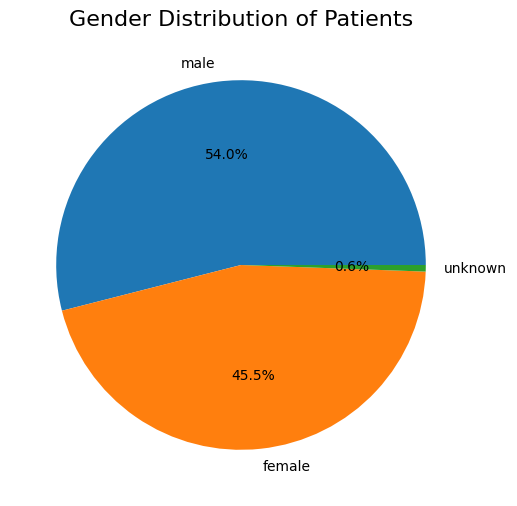

In [4]:
# Distribution of Disease over Gender
plt.figure(figsize=(8, 6))
plt.pie(tabular_data['sex'].value_counts(), labels=tabular_data['sex'].value_counts().index, autopct="%.1f%%")
plt.title('Gender Distribution of Patients', size=16)
plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


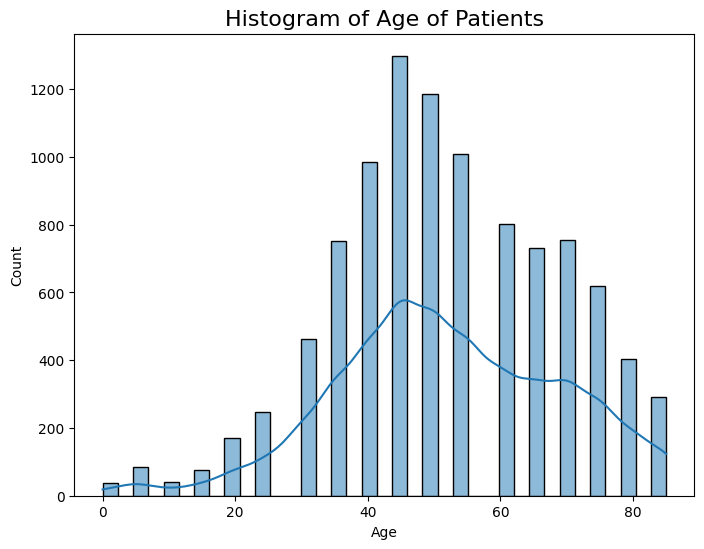

In [5]:
# Histogram of Age of Patients
plt.figure(figsize=(8, 6))
sns.histplot(tabular_data['age'].dropna(), kde=True)
plt.title('Histogram of Age of Patients', size=16)
plt.xlabel('Age')
plt.show()

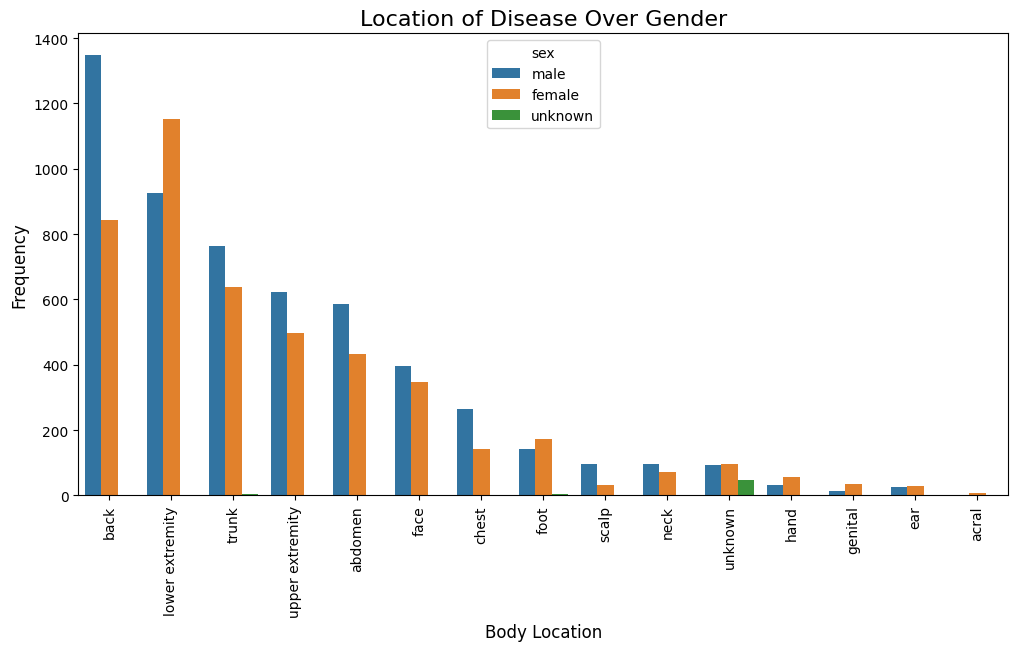

In [6]:
# Location of Disease Over Gender
value_counts = tabular_data[['localization', 'sex']].value_counts().reset_index(name='count')
plt.figure(figsize=(12, 6))
sns.barplot(x='localization', y='count', hue='sex', data=value_counts)
plt.title('Location of Disease Over Gender', size=16)
plt.xlabel('Body Location', size=12)
plt.ylabel('Frequency', size=12)
plt.xticks(rotation=90)
plt.show()

In [7]:
# Importing Image Data with Pixel Values and Labels
data = pd.read_csv('/kaggle/input/skin-cancer-mnist-ham10000/hmnist_28_28_RGB.csv')

In [8]:
# Splitting data into features (x) and labels (y)
x = data.drop('label', axis=1)
y = data['label']

In [9]:
# Oversampling to Overcome Class Imbalance
oversample = RandomOverSampler()
x, y = oversample.fit_resample(x, y)
x = np.array(x).reshape(-1, 28, 28, 3)
print('Shape of X after oversampling:', x.shape)

Shape of X after oversampling: (46935, 28, 28, 3)


In [10]:
# Standardizing Data
x = (x - np.mean(x)) / np.std(x)

In [11]:
# Splitting Data into Training and Testing Sets
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=1)
print(f'Training set size: {X_train.shape}, Testing set size: {X_test.shape}')

Training set size: (37548, 28, 28, 3), Testing set size: (9387, 28, 28, 3)


In [12]:
from tensorflow.keras.layers import Input
# Building the CNN Model
model = Sequential([
    Input(shape=(28, 28, 3)),           # Input layer defining the shape
    Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(32, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2)),
    Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same'),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPool2D(pool_size=(2, 2), padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(7, activation='softmax')
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 13, 13, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       147,520 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 7)              │           231 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 182,663 (713.53 KB)

 Trainable params: 182,663 (713.53 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='best_model.keras',  # changed to `.keras` extension
    monitor='val_accuracy',       # monitoring validation accuracy
    mode='max',
    save_best_only=True,
    verbose=1
)

In [14]:
# Compiling the Model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [15]:
# Training the Model
history = model.fit(
    X_train, Y_train,
    validation_split=0.2,
    batch_size=128,
    epochs=20,
    callbacks=[callback]
)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step - accuracy: 0.4013 - loss: 1.4935
Epoch 1: val_accuracy improved from -inf to 0.67204, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 34s 134ms/step - accuracy: 0.4018 - loss: 1.4924 - val_accuracy: 0.6720 - val_loss: 0.8811
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step - accuracy: 0.7101 - loss: 0.7937
Epoch 2: val_accuracy improved from 0.67204 to 0.79854, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 132ms/step - accuracy: 0.7103 - loss: 0.7933 - val_accuracy: 0.7985 - val_loss: 0.5654
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 127ms/step - accuracy: 0.8237 - loss: 0.4815
Epoch 3: val_accuracy improved from 0.79854 to 0.86831, saving model to best_model.keras
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 136ms/step - accuracy: 0.8238 - loss: 0.4813 - val_accuracy: 0.8683 - val_loss: 0.3868
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step - accuracy: 0.8849 - loss: 0.3244
Epoch 4: val_accuracy im

In [16]:
# After training, you can plot the training history
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

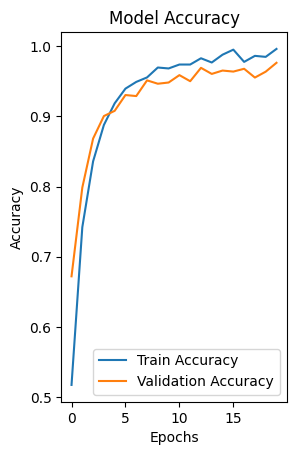

In [17]:
# Plotting Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

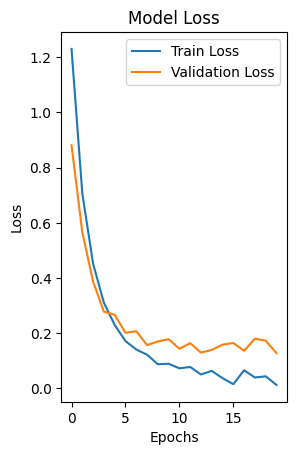

In [18]:
# Plotting Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()